In [2]:
import numpy as np 
import scipy as sci 
import matplotlib.pyplot as plt 

In [ ]:
sci.special.jn(0, 0.1) #Bessel de orden cero

np.float64(0.9975015620660401)

In [4]:
X = np.arange(0, 10*np.pi+0.01, 0.01)

In [5]:
X

array([0.000e+00, 1.000e-02, 2.000e-02, ..., 3.140e+01, 3.141e+01,
       3.142e+01])

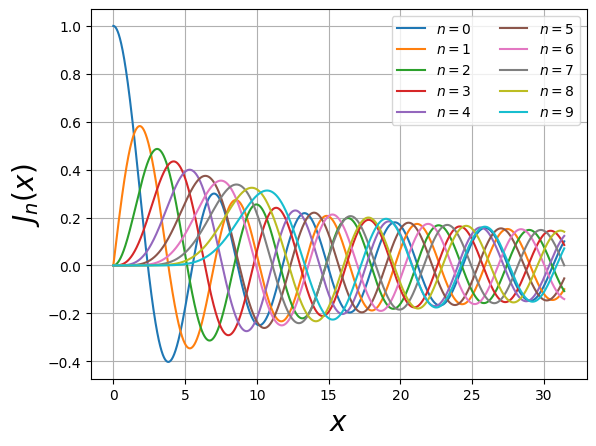

In [16]:
#plt.plot(X, sci.special.jn(0, X), 'k') #No es necesario usar el while para evaluarlo
#plt.plot(X, sci.special.jn(1, X), 'r')
for i in range (10):
    plt.plot(X, sci.special.jn(i, X), label = r'$n =' + str(i) +'$')
plt.xlabel(r'$x$', size=20)
plt.ylabel(r'$J_n(x)$', size=20)
plt.legend(loc = 'upper right', ncols = 2)
plt.grid()
plt.show()

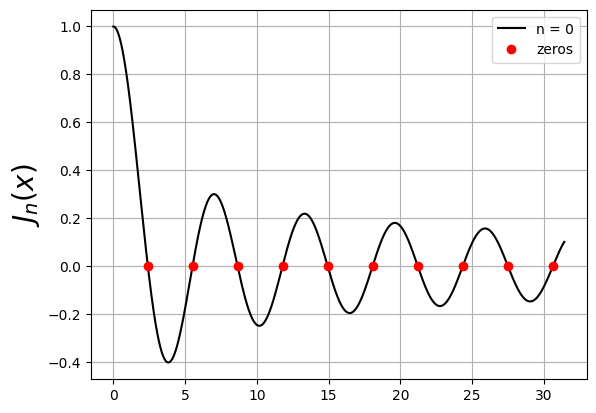

In [37]:
zeros = sci.special.jn_zeros(0, 10)
y = np.zeros(10)

plt.plot(X, sci.special.jn(0, X), 'k', label = r'n = 0') 
plt.plot(zeros, y, 'ro', label = r'zeros')
plt.ylabel(r'$J_n(x)$', size=20)
plt.legend(loc = 'upper right')
plt.grid()
plt.show()

In [ ]:
#Integral de cero a 1 de J_nu(mu_n x) J_nu(mu_m x) x con n=1 y m=2
#Ortogonalidad. Da cero si m != n y (|J_nu|_n)² si n = m

In [42]:
nu = 2 #en este caso nu es el orden y m,n la cantidad de ceros

a = sci.special.jn_zeros(nu, 10)

def f(x, n, m):
    b = sci.special.jn(nu, a[n]*x)
    c = sci.special.jn(nu, a[m]*x)
    return b*c*x

In [43]:
f(0.1,1,2)

np.float64(0.0012564702005958212)

In [44]:
sci.integrate.quad(f,0,1,args=(1,2))

(1.0408340855860843e-17, 1.1712437440134773e-14)

In [45]:
results = np.zeros([10,10])
for n in range(10):
    for m in range(10):
        values = sci.integrate.quad(f,0,1,args=(n,m))[0]
        results[n][m] = values

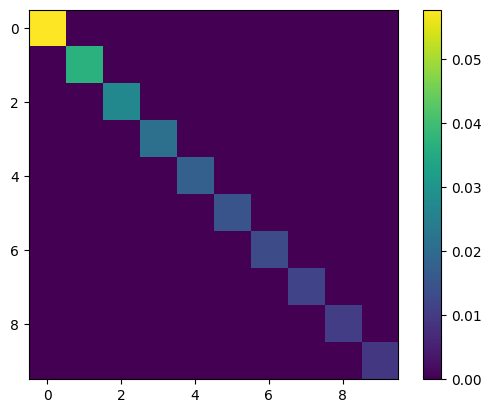

In [47]:
plt.imshow(results)
plt.colorbar()
plt.show()